<a href="https://colab.research.google.com/github/MargaretBU/LAGCC-Data-Analysis/blob/main/Margaret_Burke_Rats_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WHERE ARE THE RATS?**

### •	Following the Covid outbreak in 2020 there were reports of a citywide rat population explosion
### •	This project aims to outline the parameters of the problem and determine the locations of the worst infestations


## **1. IMPORT NYC RODENT INSPECTION DATASET AND EXAMINE DATA**

In [1]:
#import padas
import pandas as pd

In [2]:
#import NYC Rodent Inspection Data as CSV file in Pandas
#Note: dataset is quite large so it can take a minute or so to load
df=pd.read_csv('https://data.cityofnewyork.us/api/views/p937-wjvj/rows.csv')

In [3]:
#run .head() to get a view of first five rows of df
df.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,...,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,NTA
0,Initial,13398733,PC7868067,1,2.045480e+09,2,4548,131,2996,HOLLAND AVENUE,...,Bronx,05/26/2022 08:15:42 AM,Passed,05/27/2022 08:30:00 AM,"(40.869547110196, -73.865257650031)",11.0,15.0,33801.0,2054876.0,Allerton
1,Initial,13147400,PC7581532,1,3.033500e+09,3,3350,59,103,WOODBINE STREET,...,Brooklyn,03/02/2020 02:30:42 PM,Passed,03/12/2020 12:12:50 PM,"(40.691796814585, -73.917465549218)",4.0,34.0,417.0,3076615.0,Bushwick (East)
2,Compliance,13236586,PC7682651,2,2.025050e+09,2,2505,1,1060,ANDERSON AVENUE,...,Bronx,05/31/2021 09:43:57 AM,Passed,06/02/2021 03:28:03 PM,"(40.833723137559, -73.926052122448)",4.0,16.0,193.0,2003055.0,Highbridge
3,Initial,13163168,PC7585308,1,3.060450e+09,3,6045,6,406,86 STREET,...,Brooklyn,06/16/2020 09:00:42 AM,Passed,07/24/2020 12:11:10 PM,"(40.622588788561, -74.028036390824)",10.0,43.0,160.0,3153522.0,Bay Ridge
4,Initial,13661515,PC8122655,1,NaN,1,529,9,NaN,NaN,...,Manhattan,06/07/2023 04:36:13 PM,Passed,06/08/2023 10:38:30 AM,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#run .shape to get a count of rows and columns
df.shape

(2443386, 25)

In [5]:
#display column headings
list(df)

['INSPECTION_TYPE',
 'JOB_TICKET_OR_WORK_ORDER_ID',
 'JOB_ID',
 'JOB_PROGRESS',
 'BBL',
 'BORO_CODE',
 'BLOCK',
 'LOT',
 'HOUSE_NUMBER',
 'STREET_NAME',
 'ZIP_CODE',
 'X_COORD',
 'Y_COORD',
 'LATITUDE',
 'LONGITUDE',
 'BOROUGH',
 'INSPECTION_DATE',
 'RESULT',
 'APPROVED_DATE',
 'LOCATION',
 'COMMUNITY BOARD',
 'COUNCIL DISTRICT',
 'CENSUS TRACT',
 'BIN',
 'NTA']

In [6]:
#display list of columns with null data
df.isnull().sum()

INSPECTION_TYPE                     0
JOB_TICKET_OR_WORK_ORDER_ID         0
JOB_ID                              0
JOB_PROGRESS                        0
BBL                             85172
BORO_CODE                           0
BLOCK                               0
LOT                                 0
HOUSE_NUMBER                    50509
STREET_NAME                      6944
ZIP_CODE                        14823
X_COORD                        471946
Y_COORD                        471946
LATITUDE                        13728
LONGITUDE                       13728
BOROUGH                           283
INSPECTION_DATE                    17
RESULT                             33
APPROVED_DATE                    5652
LOCATION                        14969
COMMUNITY BOARD                 68253
COUNCIL DISTRICT                68253
CENSUS TRACT                    68253
BIN                             85172
NTA                             68253
dtype: int64

In [7]:
#calculate percentage of null values for each column
df.isnull().sum() / len(df) * 100

INSPECTION_TYPE                 0.000000
JOB_TICKET_OR_WORK_ORDER_ID     0.000000
JOB_ID                          0.000000
JOB_PROGRESS                    0.000000
BBL                             3.485818
BORO_CODE                       0.000000
BLOCK                           0.000000
LOT                             0.000000
HOUSE_NUMBER                    2.067172
STREET_NAME                     0.284196
ZIP_CODE                        0.606658
X_COORD                        19.315245
Y_COORD                        19.315245
LATITUDE                        0.561843
LONGITUDE                       0.561843
BOROUGH                         0.011582
INSPECTION_DATE                 0.000696
RESULT                          0.001351
APPROVED_DATE                   0.231318
LOCATION                        0.612633
COMMUNITY BOARD                 2.793378
COUNCIL DISTRICT                2.793378
CENSUS TRACT                    2.793378
BIN                             3.485818
NTA             

In [8]:
#find unique values column for groupby operatios
df['JOB_TICKET_OR_WORK_ORDER_ID'].is_unique

True

## **2. CALL-UP DETAILED INFORMATION ON SELECTED COLUMNS**

In [9]:
#INSPECTION TYPE
TYPE = df['INSPECTION_TYPE'].unique().tolist()
TYPE

['Initial', 'Compliance', 'STOPPAGE', 'BAIT', 'CLEAN_UPS']

In [10]:
#RESULT
RESULT = df['RESULT'].unique().tolist()
RESULT

['Passed',
 'Failed for Other R',
 'Stoppage done',
 'Monitoring visit',
 'Bait applied',
 'Rat Activity',
 'Cleanup done',
 nan]

In [11]:
#BIN stands for Building Identification Number,
#It's a unique number assigned by the Department of City Planning to identify each building in New York City.
#It's a long list so I'm displaying 10 samples to get an idea of what the data looks like
BIN_UNIQUE = df['BIN'].unique()
BIN_UNIQUE = BIN_UNIQUE.tolist()[:10]
print(BIN_UNIQUE)

[2054876.0, 3076615.0, 2003055.0, 3153522.0, nan, 3393099.0, 1006077.0, 1009507.0, 4083277.0, 2012644.0]


In [12]:
##JOB PROGRESS. This is a set of numerical values that I haven't been able to find correlations for (aka don't know what they mean)
PROGRESS = df['JOB_PROGRESS'].unique().tolist()
PROGRESS

[1,
 2,
 3,
 4,
 8,
 10,
 7,
 6,
 5,
 14,
 9,
 12,
 21,
 11,
 17,
 13,
 42,
 16,
 19,
 18,
 22,
 29,
 33,
 15,
 26,
 27,
 39,
 23,
 25,
 31,
 28,
 50,
 24,
 43,
 119,
 38,
 35,
 47,
 32,
 36,
 41,
 20,
 52,
 118,
 96,
 57,
 34,
 131,
 87,
 112,
 51,
 129,
 116,
 117,
 48,
 86,
 62,
 125,
 30,
 54,
 46,
 92,
 89,
 40,
 44,
 135,
 113,
 58,
 56,
 83,
 90,
 53,
 45,
 105,
 55,
 75,
 72,
 93,
 102,
 120,
 109,
 127,
 59,
 122,
 37,
 111,
 115,
 49,
 106,
 130,
 94,
 69,
 123,
 124,
 103,
 71,
 60,
 79,
 81,
 85,
 84,
 98,
 95,
 104,
 134,
 97,
 80,
 107,
 76,
 73,
 132,
 126,
 128,
 74,
 67,
 82,
 64,
 91,
 66,
 68,
 121,
 63,
 110,
 114,
 137,
 138,
 133,
 100,
 88,
 78,
 61,
 99,
 70,
 77,
 65,
 101,
 136,
 108,
 173,
 141,
 157,
 163,
 155,
 149,
 162,
 148,
 147,
 154,
 150,
 140,
 139,
 145,
 174,
 165,
 175,
 160,
 159,
 172,
 158,
 156,
 161,
 166,
 153,
 164,
 143,
 167,
 170,
 144,
 142,
 152,
 151,
 146,
 171,
 169,
 168]

In [13]:
#groupby NTA to figure out what it is. It'Neighborhood Tabulation Area.
df.groupby(['NTA'])['JOB_TICKET_OR_WORK_ORDER_ID'].count()

NTA
Allerton                                  9814
Annadale-Huguenot-Prince's Bay-Woodrow    1881
Arden Heights-Rossville                   1417
Astoria (Central)                         3850
Astoria (East)-Woodside (North)           8711
                                          ... 
Windsor Terrace-South Slope               1783
Woodhaven                                 1327
Woodlawn Cemetery                            1
Woodside                                  5094
Yankee Stadium-Macombs Dam Park            252
Name: JOB_TICKET_OR_WORK_ORDER_ID, Length: 244, dtype: int64

In [14]:
#groupby with LOCATION to figure out what it is. Looks like it's Longitude/Latitude coordinates
#plugging a coordinate into Google Maps confirms this
df.groupby(['LOCATION'])['JOB_TICKET_OR_WORK_ORDER_ID'].count()

LOCATION
(-18.9070188901517, -79.4661030572311)        2
(0.0, 0.0)                                14448
(40.4966368903932, -74.2452958220596)         1
(40.49879961998, -74.241492898018)            1
(40.498916887191, -74.240551279624)           4
                                          ...  
(40.911581977662, -73.902813648097)           2
(40.912212242935, -73.901615157374)           1
(40.912566226931, -73.901516944144)           2
(40.912822326386, -73.902504292365)           2
(40.91286346943, -73.902471669247)            7
Name: JOB_TICKET_OR_WORK_ORDER_ID, Length: 347404, dtype: int64

## **3. CLEAN THE DATA**

In [15]:
import numpy as np

In [16]:
#create rats1 dataframe dropping unnecessary columns
#Dropping 'BBL' which is a parcel number that represents the Borough, Block, and Lot of each parcel
#    there is a high percentate of Null value rows in this Column, and this information is already represented in other columns of the dataset.
#Dropping 'X_Coord' and 'Y_Coord' which represent taxlots in NY State Plane Long Island Coordinate system
#     this information is already represented in other columns of the dataset
#Dropping 'LOCATION' which is a numerical value representing the latitued and longitude of inspection site
#     along with LATITUDE and LONGITUDE colums it is likely used in creating maps of inspection sites.
#Dropping 'JOB_PROGRESS'as I've been unable to find out what the long list of numerical values refers to
rats1 = df[['INSPECTION_TYPE',
 'JOB_TICKET_OR_WORK_ORDER_ID',
 'JOB_ID',
 'BORO_CODE',
 'BLOCK',
 'LOT',
 'HOUSE_NUMBER',
 'STREET_NAME',
 'ZIP_CODE',
 'BOROUGH',
 'INSPECTION_DATE',
 'RESULT',
 'APPROVED_DATE',
 'LOCATION',
 'COMMUNITY BOARD',
 'COUNCIL DISTRICT',
 'CENSUS TRACT',
 'BIN',
 'NTA']]

In [17]:
#to replace null values in BOROUGH column, change all values based on the BORO_CODE column
rats1.loc[df['BORO_CODE'].isin(['1']), 'BOROUGH'] = 'Manhattan'
rats1.loc[df['BORO_CODE'].isin(['2']), 'BOROUGH'] = 'Bronx'
rats1.loc[df['BORO_CODE'].isin(['3']), 'BOROUGH'] = 'Brooklyn'
rats1.loc[df['BORO_CODE'].isin(['4']), 'BOROUGH'] = 'Queens'
rats1.loc[df['BORO_CODE'].isin(['5']), 'BOROUGH'] = 'Staten Island'

In [18]:
#check BOROUGH changes
BOROUGH = rats1['BOROUGH'].unique().tolist()
BOROUGH

['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens', nan]

In [19]:
#run list of rats1 columns with null data
rats1.isnull().sum()

INSPECTION_TYPE                    0
JOB_TICKET_OR_WORK_ORDER_ID        0
JOB_ID                             0
BORO_CODE                          0
BLOCK                              0
LOT                                0
HOUSE_NUMBER                   50509
STREET_NAME                     6944
ZIP_CODE                       14823
BOROUGH                          283
INSPECTION_DATE                   17
RESULT                            33
APPROVED_DATE                   5652
LOCATION                       14969
COMMUNITY BOARD                68253
COUNCIL DISTRICT               68253
CENSUS TRACT                   68253
BIN                            85172
NTA                            68253
dtype: int64

In [20]:
#run list of data types for all rats1 columns
rats1.dtypes

INSPECTION_TYPE                 object
JOB_TICKET_OR_WORK_ORDER_ID      int64
JOB_ID                          object
BORO_CODE                        int64
BLOCK                            int64
LOT                              int64
HOUSE_NUMBER                    object
STREET_NAME                     object
ZIP_CODE                       float64
BOROUGH                         object
INSPECTION_DATE                 object
RESULT                          object
APPROVED_DATE                   object
LOCATION                        object
COMMUNITY BOARD                float64
COUNCIL DISTRICT               float64
CENSUS TRACT                   float64
BIN                            float64
NTA                             object
dtype: object

In [21]:
#replace null values in select columns
rats1.loc[rats1['HOUSE_NUMBER'].isnull(), 'HOUSE_NUMBER'] = 'MISSING'
rats1.loc[rats1['STREET_NAME'].isnull(), 'STREET_NAME'] = 'MISSING'
rats1.loc[rats1['ZIP_CODE'].isnull(), 'ZIP_CODE'] = '0'
rats1.loc[rats1['BOROUGH'].isnull(), 'BOROUGH'] = 'MISSING'
rats1.loc[rats1['INSPECTION_DATE'].isnull(), 'INSPECTION_DATE'] = 'MISSING'
rats1.loc[rats1['RESULT'].isnull(), 'RESULT'] = 'MISSING'
rats1.loc[rats1['APPROVED_DATE'].isnull(),'APPROVED_DATE'] = 'MISSING'
rats1.loc[rats1['LOCATION'].isnull(), 'LOCATION'] = 'MISSING'
rats1.loc[rats1['COMMUNITY BOARD'].isnull(), 'COMMUNITY BOARD'] = '0'
rats1.loc[rats1['COUNCIL DISTRICT'].isnull(), 'COUNCIL DISTRICT'] = '0'
rats1.loc[rats1['CENSUS TRACT'].isnull(), 'CENSUS TRACT'] = '0'
rats1.loc[rats1['BIN'].isnull(), 'BIN'] = '0'
rats1.loc[rats1['NTA'].isnull(), 'NTA'] = 'MISSING'

In [22]:
#convert float columns to integers
rats1 = rats1.astype({"ZIP_CODE":'int', "COMMUNITY BOARD":'int',"CENSUS TRACT":'int',"COUNCIL DISTRICT":'int',"BIN":'int'})

In [23]:
#rerun list of rats1 columns with null data to check that all null values were replaced
rats1.isnull().sum()

INSPECTION_TYPE                0
JOB_TICKET_OR_WORK_ORDER_ID    0
JOB_ID                         0
BORO_CODE                      0
BLOCK                          0
LOT                            0
HOUSE_NUMBER                   0
STREET_NAME                    0
ZIP_CODE                       0
BOROUGH                        0
INSPECTION_DATE                0
RESULT                         0
APPROVED_DATE                  0
LOCATION                       0
COMMUNITY BOARD                0
COUNCIL DISTRICT               0
CENSUS TRACT                   0
BIN                            0
NTA                            0
dtype: int64

In [24]:
#rerun list of data types for all rats1 columns to confirm that all float datatypes were converted to integer
rats1.dtypes

INSPECTION_TYPE                object
JOB_TICKET_OR_WORK_ORDER_ID     int64
JOB_ID                         object
BORO_CODE                       int64
BLOCK                           int64
LOT                             int64
HOUSE_NUMBER                   object
STREET_NAME                    object
ZIP_CODE                        int64
BOROUGH                        object
INSPECTION_DATE                object
RESULT                         object
APPROVED_DATE                  object
LOCATION                       object
COMMUNITY BOARD                 int64
COUNCIL DISTRICT                int64
CENSUS TRACT                    int64
BIN                             int64
NTA                            object
dtype: object

## **4. RUN STATISTICAL ANALYSIS TO GET AN OVERVIEW OF THE NYC RAT POPULATION PROBLEM**

In [25]:
#create rats2 dataframe limiting only to 'initial' for 'INSPECTION_TYPE' and 'Rat Activity' for 'RESULT'
#this will limit reduntant reports for specific locations
rats2 = rats1[(rats1['RESULT'] =='Rat Activity') & (rats1['INSPECTION_TYPE']=='Initial')]

In [26]:
#confirm rats2 RESULT column only contains value 'Rat Activity'
RESULT = rats2['RESULT'].unique().tolist()
RESULT

['Rat Activity']

In [27]:
#confirm rats2 'INSPECTION_TYPE' column only contains value 'Initial'
RESULT = rats2['INSPECTION_TYPE'].unique().tolist()
RESULT

['Initial']

In [28]:
#run rats2.head() to view a sample of the new dataframe
rats2.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,NTA
20,Initial,13691845,PC8162969,2,2868,5,0000,UNIVERSITY AVENUE,0,Bronx,07/31/2023 10:50:00 AM,Rat Activity,08/02/2023 10:13:37 AM,"(0.0, 0.0)",0,0,0,0,MISSING
23,Initial,13605525,PC8065328,1,1690,10,F,D R DRIVE,10029,Manhattan,03/24/2023 07:30:00 AM,Rat Activity,03/27/2023 09:37:29 AM,MISSING,0,0,0,0,MISSING
24,Initial,13702353,PC8173580,1,592,87,000,CHRISTOPHER STREET,0,Manhattan,08/17/2023 08:45:10 AM,Rat Activity,08/18/2023 03:09:34 PM,"(0.0, 0.0)",0,0,0,0,MISSING
27,Initial,13606033,PC8072949,2,3212,1,0000,AQUEDUCT AVENUE,0,Bronx,03/23/2023 11:25:30 AM,Rat Activity,03/28/2023 11:51:21 AM,"(0.0, 0.0)",0,0,0,0,MISSING
28,Initial,13218538,PC7693337,3,1997,16,MISSING,MISSING,11238,Brooklyn,04/19/2021 01:42:51 PM,Rat Activity,04/20/2021 10:29:34 PM,MISSING,0,0,0,0,MISSING


In [29]:
#run rats2.shape() to get a count of rows/columns
rats2.shape

(246951, 19)

In [30]:
#Find the ten locations citywide with the most indpections
BIN = rats2.groupby(['BIN'])['JOB_TICKET_OR_WORK_ORDER_ID'].count().sort_values(ascending=False).head(15)
BIN
#It looks like the first four rows are dummy results (including the 0 result I used to clean-up null values).
#The first real value, 1077504, is, according to the DOB BIN locator:
#132 AVENUE D MANHATTAN 10009 BIN#1077504
#https://a810-bisweb.nyc.gov/bisweb/PropertyProfileOverviewServlet?bin=1077504&go4=+GO+&requestid=0

BIN
0          10105
2000000     4612
1000000     4033
3000000     2692
4000000      332
1077504      117
2011855       85
1089325       85
2092109       83
2092078       74
2092074       73
1075625       73
2092082       72
1075623       72
2091187       70
Name: JOB_TICKET_OR_WORK_ORDER_ID, dtype: int64

In [31]:
#Locate the addresses of the 10 worst violators
options = [1077504, 2011855, 1089325, 2092109, 2092078, 2092074, 1075625, 2092082, 1075623, 2091187]
mask = rats2['BIN'].isin(options)
WORSTRATS = rats2[mask][['BIN', 'BOROUGH', 'HOUSE_NUMBER', 'STREET_NAME', 'ZIP_CODE']]
WORSTRATS = WORSTRATS.drop_duplicates(subset='BIN')
WORSTRATS = WORSTRATS.sort_values(by=['BOROUGH', 'ZIP_CODE','STREET_NAME', 'HOUSE_NUMBER'])
WORSTRATS

,BIN,BOROUGH,HOUSE_NUMBER,STREET_NAME,ZIP_CODE
140208,2092082,Bronx,3603,3 AVENUE,10456
101606,2092109,Bronx,1410,WASHINGTON AVENUE,10456
4055,2091187,Bronx,1230,WEBSTER AVENUE,10456
183164,2092074,Bronx,1320,WEBSTER AVENUE,10456
90365,2092078,Bronx,1402,WEBSTER AVENUE,10456
120550,2011855,Bronx,559,EAST 180 STREET,10457
195101,1075623,Manhattan,72,AVENUE C,10009
194074,1077504,Manhattan,134,AVENUE D,10009
194749,1075625,Manhattan,636,EAST 5 STREET,10009
291219,1089325,Manhattan,281,LENOX AVENUE,10027


In [33]:
#using a Regex, create a year column based on Inspection Date data
#in order to do a comparison across years in dataset
rats2['YEAR'] = rats2['INSPECTION_DATE'].str.extract('(\\d{4})')

<ipython-input-33-e34391359ae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rats2['YEAR'] = rats2['INSPECTION_DATE'].str.extract('(\\d{4})')


In [34]:
#confirm YEAR column populeted properly
#groupby to with unique value to count number of inspections (where rats were found since this is now the only RESULT in rats2)
NEWYEAR = rats2.groupby(['YEAR'])['JOB_TICKET_OR_WORK_ORDER_ID'].count()
NEWYEAR

YEAR
2001        2
2002        2
2003        1
2009     3226
2010    11892
2011    11642
2012    11288
2013    11184
2014    10841
2015    11975
2016    15901
2017    21058
2018    20659
2019    22593
2020    11096
2021    19394
2022    38776
2023    25418
Name: JOB_TICKET_OR_WORK_ORDER_ID, dtype: int64

In [35]:
#Why did a nan value show up for year when I run  .unique().tolist() query but it doesn't show in the previous groupby function.
NEWYEAR2 = rats2['YEAR'].unique().tolist()
NEWYEAR2
#I don't know.
#In any case rats2['YEAR'] still needs to be cleaned up

['2023',
 '2021',
 '2022',
 '2013',
 '2019',
 '2016',
 '2020',
 '2010',
 '2018',
 '2015',
 '2014',
 '2011',
 '2017',
 '2012',
 '2009',
 nan,
 '2003',
 '2001',
 '2002']

In [36]:
#create rats3 df dropping all rows where the value of 'YEAR' is nan
rats3 = rats2.dropna(subset=['YEAR'])

In [37]:
#run .unique().tolist()to confirm nan rows were deleted
NEWYEAR3 = rats3['YEAR'].unique().tolist()
NEWYEAR3

['2023',
 '2021',
 '2022',
 '2013',
 '2019',
 '2016',
 '2020',
 '2010',
 '2018',
 '2015',
 '2014',
 '2011',
 '2017',
 '2012',
 '2009',
 '2003',
 '2001',
 '2002']

In [38]:
#let's look at the column headers for rats3
list(rats3)

['INSPECTION_TYPE',
 'JOB_TICKET_OR_WORK_ORDER_ID',
 'JOB_ID',
 'BORO_CODE',
 'BLOCK',
 'LOT',
 'HOUSE_NUMBER',
 'STREET_NAME',
 'ZIP_CODE',
 'BOROUGH',
 'INSPECTION_DATE',
 'RESULT',
 'APPROVED_DATE',
 'LOCATION',
 'COMMUNITY BOARD',
 'COUNCIL DISTRICT',
 'CENSUS TRACT',
 'BIN',
 'NTA',
 'YEAR']

## **5. GRAPH THE RESULTS**

In [39]:
#create a series of graphs based on the findings in the rats3 database. First import graphing ibraries and sub-libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['font.family'] = 'monospace'
import matplotlib.patheffects as PathEffects
import matplotlib.style
import matplotlib.patheffects as pe
mpl.style.use('seaborn-v0_8-dark')
color_map = {'Bronx': '#DD8452', 'Brooklyn': '#55A868', 'Manhattan': '#4C72B0', 'Queens': '#C44E52', 'Staten Island': '#8172B3'}
%matplotlib inline

In [40]:
#rats3 needs further cleaning in order to limit the parameters of the graphs
#drop years 2001 to 2011 and year 2023, and display the remaining years in chronoligical order
rats4 = rats3[~rats3['YEAR'].isin(['2001', '2002','2003','2009','2010','2011','2023'])]
unique_values = sorted(rats4['YEAR'].unique().tolist())
print(unique_values)

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [41]:
#ooops. BOROUGH also needs some cleaning to get rid of the MISSING value
BOROUGH = rats4.groupby(['BOROUGH'])['JOB_TICKET_OR_WORK_ORDER_ID'].count()
BOROUGH

BOROUGH
Bronx            57811
Brooklyn         63437
MISSING              1
Manhattan        59870
Queens           12037
Staten Island     1609
Name: JOB_TICKET_OR_WORK_ORDER_ID, dtype: int64

In [42]:
#delete the row with MISSING listed in BOROUGH
rats5 = rats4[~rats4['BOROUGH'].isin(['MISSING'])]

In [43]:
#check to make sure the deletion worked
#It did
BOROUGH = rats5.groupby(['BOROUGH'])['JOB_TICKET_OR_WORK_ORDER_ID'].count()
BOROUGH

BOROUGH
Bronx            57811
Brooklyn         63437
Manhattan        59870
Queens           12037
Staten Island     1609
Name: JOB_TICKET_OR_WORK_ORDER_ID, dtype: int64

In [44]:
#Graph #1: Rank the five boroughs by rat activity and put the results in a new dataset
ratspop = pd.DataFrame(rats5.groupby(['BOROUGH'])['JOB_TICKET_OR_WORK_ORDER_ID'].count().sort_values(ascending=False))

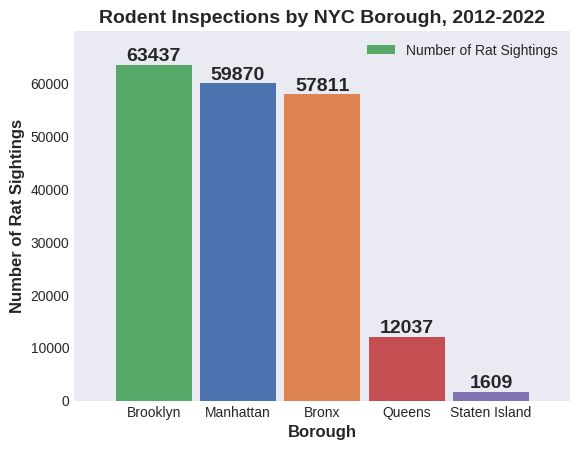

<Figure size 640x480 with 0 Axes>

In [45]:
#Create a bar graph based on ratspop
ratspop = ratspop.reset_index()
boroughs = ratspop['BOROUGH']
sightings = ratspop['JOB_TICKET_OR_WORK_ORDER_ID']
colors = ['#DD8452', '#55A868', '#4C72B0', '#C44E52', '#8172B3']
fig, ax = plt.subplots()
ax.bar(ratspop['BOROUGH'], ratspop['JOB_TICKET_OR_WORK_ORDER_ID'], width=0.9, label='Number of Rat Sightings', color=[color_map[b] for b in ratspop['BOROUGH']])
plt.margins(y=0.1, x=0.1)
for i in range(len(ratspop)):
    plt.text(boroughs[i], sightings[i], sightings[i], ha='center', va='bottom', fontsize=14, fontweight='bold')
ax.set_xlabel('Borough', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Rat Sightings', fontsize=12, fontweight='bold')
ax.set_title('Rodent Inspections by NYC Borough, 2012-2022', fontsize=14, fontweight='bold')
ax.legend()
plt.show()
fig = plt.figure()

In [46]:
#Graph #2 - Create a pie chart indicating the percentage of rat sigtings per borough
BOROUGH = rats5.groupby(['BOROUGH'])['JOB_TICKET_OR_WORK_ORDER_ID'].count()
BOROUGH_percentage = BOROUGH.div(BOROUGH.sum()).mul(100)
BOROUGH

BOROUGH
Bronx            57811
Brooklyn         63437
Manhattan        59870
Queens           12037
Staten Island     1609
Name: JOB_TICKET_OR_WORK_ORDER_ID, dtype: int64

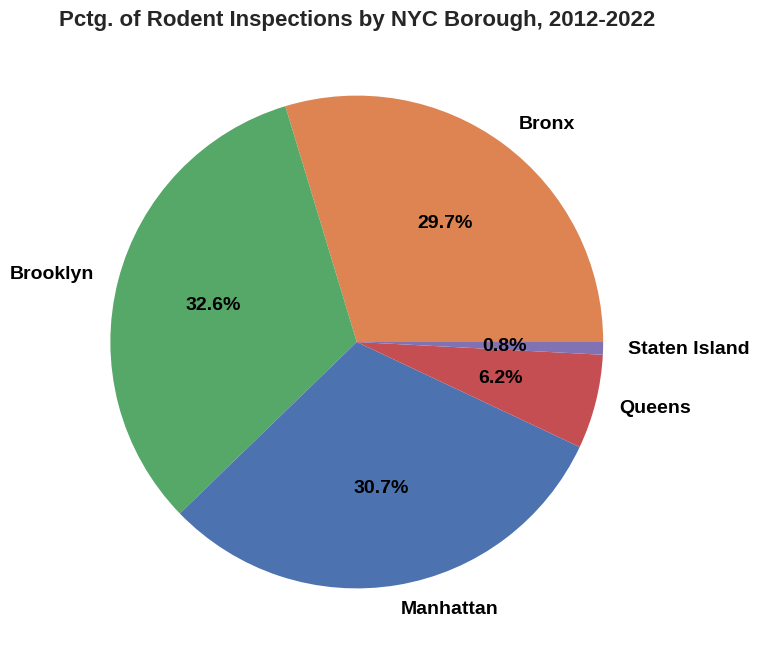

In [47]:
#Now create a pie chart
ratpercent = pd.DataFrame(BOROUGH_percentage)
ratpercent = ratpercent.reset_index()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(ratpercent['JOB_TICKET_OR_WORK_ORDER_ID'], labels=ratpercent['BOROUGH'], colors = ['#DD8452', '#55A868', '#4C72B0', '#C44E52', '#8172B3'], autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'black'})
ax.set_title('Pctg. of Rodent Inspections by NYC Borough, 2012-2022', fontsize=16, fontweight='bold', loc='center')
plt.show()

In [48]:
#Problem #3 - create a line graph plotting the fluctuations in rat population by borough from 2012 - 2022
s = rats5.groupby(['BOROUGH', 'YEAR'])['RESULT'].count()
ratsgraph = s.unstack(level='BOROUGH')
ratsgraph.plot.line(x='YEAR', y=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])

KeyError: ignored

In [49]:
#Why is the above code not working? First let's look at the first few rows of ratsgraph
ratsgraph.head()

BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island
YEAR,,,,,
2012,4281,2648,3612,597,150
2013,4833,2027,3488,716,120
2014,4279,2551,3250,605,156
2015,4911,2730,3695,537,102
2016,5574,4066,4978,1098,185


In [50]:
#Now let's look at the columns
ratsgraph.columns

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='BOROUGH')

In [51]:
#Create a new column called "YEAR" mirroring the index in order to be able to plot the graph
ratsgraph = ratsgraph.assign(YEAR=ratsgraph.index)

In [52]:
#check the new ratsgraph columns
ratsgraph.columns

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'YEAR'], dtype='object', name='BOROUGH')

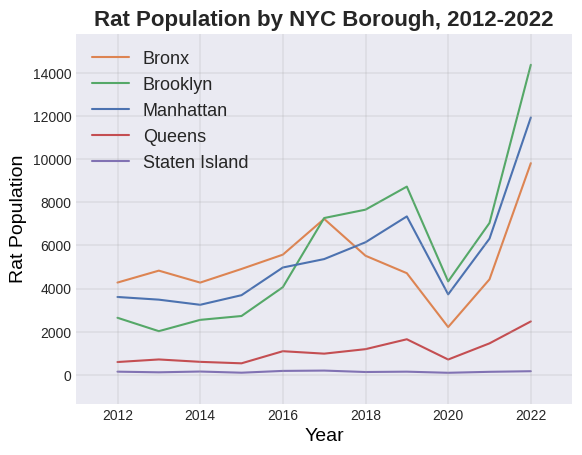

In [53]:
ax = ratsgraph.plot(x='YEAR', y=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], color = ['#DD8452', '#55A868', '#4C72B0', '#C44E52', '#8172B3'],zorder=0.1)
ax.grid(True, color='darkgrey', linestyle='solid', linewidth=0.25, zorder=0.2)
plt.margins(y=0.1, x=0.1)
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Rat Population', fontsize=14, color='black')
plt.legend(fontsize=13, facecolor='black', loc='upper left', bbox_to_anchor=(0, 1))
plt.title('Rat Population by NYC Borough, 2012-2022', fontsize=16, fontweight='bold')
plt.show()

## **6. LIMITING THE DATA TO THE TIME PERIOD AROUND NYC'S COVID SHUTDOWN**

### **The 2012-2022 line graph shows a significant change in the rat population around the time of NYC's Covid shutdown (March 2020)**

### **Limiting the data to the time period around the shutdown will clarify the numbers**

In [54]:
#rats5 needs further cleaning in order to limit the parameters of the graphs
#drop years 2001 to 2017 and year 2023, and display the remaining years in chronoligical order
rats6 = rats5[~rats5['YEAR'].isin(['2012','2013','2014','2015','2016','2017'])]
unique_values = sorted(rats6['YEAR'].unique().tolist())
print(unique_values)

['2018', '2019', '2020', '2021', '2022']


In [65]:
#Problem #3 - create a line graph plotting the fluctuations in rat population by borough from 2012 - 2022df = pd.DataFrame({ 'Bronx': [2217, 4430, 9815], 'Brooklyn': [4335, 7043, 14376], 'Manhattan': [3733, 6316, 11934], 'Queens': [713, 1462, 2479], 'Staten Island': [98, 143, 171] }, index=[2020, 2021, 2022])

In [68]:
#Problem #3 - create a line graph plotting the fluctuations in rat population by borough from 2012 - 2022
s = rats6.groupby(['BOROUGH', 'YEAR'])['RESULT'].count()
short_ratsgraph = s.unstack(level='BOROUGH')
short_ratsgraph.plot.line(x='YEAR', y=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])

KeyError: ignored

In [69]:
#Create a new column called "YEAR" mirroring the index in order to be able to plot the graph
short_ratsgraph = short_ratsgraph.assign(YEAR=short_ratsgraph.index)

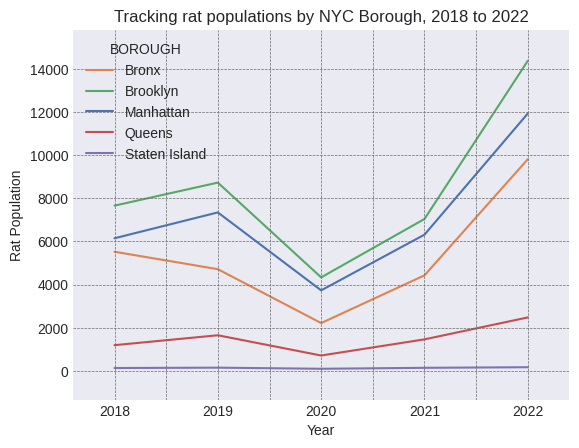

In [70]:
ax = short_ratsgraph.plot(x='YEAR', y=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], color = ['#DD8452', '#55A868', '#4C72B0', '#C44E52', '#8172B3'], zorder=0.1)
ax.grid(True, color='dimgray', linestyle='dashed', linewidth=0.5, zorder=0.2)
plt.margins(y=0.1, x=0.1)
plt.xlabel('Year')
plt.ylabel('Rat Population')
plt.title('Tracking rat populations by NYC Borough, 2018 to 2022')
plt.show()

In [71]:
#Create a bargraph showing the percentage change in Rat Population from 2020 - 2022 = pd.DataFrame({ 'Bronx': [2217, 4430, 9815], 'Brooklyn': [4335, 7043, 14376], 'Manhattan': [3733, 6316, 11934], 'Queens': [713, 1462, 2479], 'Staten Island': [98, 143, 171] }, index=[2020, 2021, 2022])

In [72]:
ratspercent = df.pct_change(periods=2).loc[2022] * 100

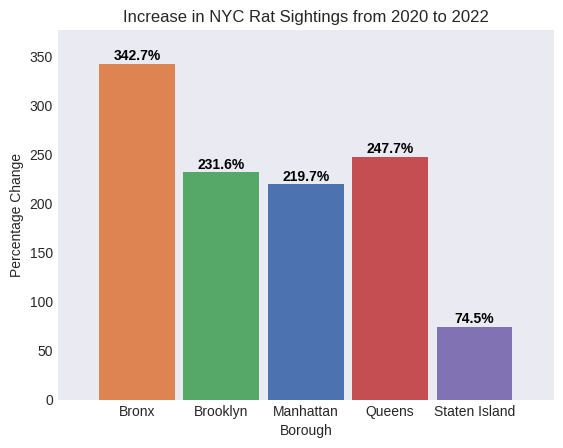

In [73]:
plt.bar(ratspercent.index, ratspercent.values, color = ['#DD8452', '#55A868', '#4C72B0', '#C44E52', '#8172B3'], width=0.9, align='center')
plt.margins(y=0.1, x=0.1)
plt.xlabel('Borough')
plt.ylabel('Percentage Change')
plt.title('Increase in NYC Rat Sightings from 2020 to 2022')
for x, y in zip(ratspercent.index, ratspercent.values):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')
plt.show()

# **7. CONCLUSION**


### NYC has indeed seen a steep rise in rat infestations, most likely due to changes in human behavior since Covid 1
### The size of the problem, however, varies by Borough
### And although the problem seems intractable 2
### It might be worth concentrating rat mitigation efforts on the most infested neighborhoods and boroughs# New Section